In [55]:
import pyarrow
import fastparquet
import pandas as pd

# Set Pandas options to always display floats with a decimal point
# (not scientific notation)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

import seaborn as sns

In [56]:
def perform_EDA(df : pd.DataFrame, filename : str):
    """
    perform_EDA(df : pd.DataFrame, filename : str)
    Accepts a dataframe and a text filename as inputs.
    Runs some basic statistics on the data and outputs to console.

    :param df: The Pandas dataframe to explore
    :param filename: The name of the data file
    :return:
    """
    print(f"{filename} Number of records:")
    print(df.count())
    print(f"{filename} Number of duplicate records: { len(df)-len(df.drop_duplicates())}" )
    print(f"{filename} Info")
    print(df.info())
    print(f"{filename} Describe")
    print(df.describe())
    print(f"{filename} Columns with null values")
    print(df.columns[df.isnull().any()].tolist())
    rows_with_null_values = df.isnull().any(axis=1).sum()
    print(f"{filename} Number of Rows with null values: {rows_with_null_values}" )
    integer_column_list = df.select_dtypes(include='int64').columns
    print(f"{filename} Integer data type columns: {integer_column_list}")
    float_column_list = df.select_dtypes(include='float64').columns
    print(f"{filename} Float data type columns: {float_column_list}")
    # Add other codes here to explore and visualize specific columns


In [57]:
# Define the filepath and filename list
filepath = "gs://my-bigdata-project-md/landing"
filename_list = ['yellow_tripdata_2023-01.parquet']

# Iterate over the filenames
for filename in filename_list:
    # Creating full path to the file
    full_path = f"{filepath}/{filename}"
 
    
    yellowtaxi_df = pd.read_parquet(full_path, engine='pyarrow')
    perform_EDA(yellowtaxi_df, filename)


def perform_EDA(df, filename):
    # Example EDA function
    print(f"Performing EDA on {filename}")
    print(df.head())

  

yellow_tripdata_2023-01.parquet Number of records:
VendorID                 3066766
tpep_pickup_datetime     3066766
tpep_dropoff_datetime    3066766
passenger_count          2995023
trip_distance            3066766
RatecodeID               2995023
store_and_fwd_flag       2995023
PULocationID             3066766
DOLocationID             3066766
payment_type             3066766
fare_amount              3066766
extra                    3066766
mta_tax                  3066766
tip_amount               3066766
tolls_amount             3066766
improvement_surcharge    3066766
total_amount             3066766
congestion_surcharge     2995023
airport_fee              2995023
dtype: int64
yellow_tripdata_2023-01.parquet Number of duplicate records: 0
yellow_tripdata_2023-01.parquet Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Vendo

In [53]:
yellowtaxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,12741035.00,12741035,12741035,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741035.00,12741032.00,12741035.00
mean,1.52,2015-01-16 14:42:27.972079,2015-01-16 14:56:38.686013,1.68,13.13,1.04,163.25,161.08,1.39,11.90,0.31,0.50,1.85,0.24,0.28,15.11
min,1.00,2015-01-01 00:00:00,2015-01-01 00:00:00,0.00,0.00,1.00,1.00,1.00,1.00,-450.00,-79.00,-0.50,-92.42,-26.00,0.00,-450.30
25%,1.00,2015-01-09 09:26:01.500000,2015-01-09 09:43:41.500000,1.00,1.00,1.00,113.00,107.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.16
50%,2.00,2015-01-16 11:43:24,2015-01-16 11:57:36,1.00,1.68,1.00,162.00,162.00,1.00,9.00,0.00,0.50,1.00,0.00,0.30,11.16
75%,2.00,2015-01-23 19:15:56,2015-01-23 19:29:29,2.00,3.00,1.00,233.00,233.00,2.00,13.50,0.50,0.50,2.06,0.00,0.30,16.30
max,2.00,2015-01-31 23:59:59,2016-02-02 16:30:52,9.00,15420004.50,99.00,265.00,265.00,5.00,4008.00,648.02,0.50,3950588.80,1450.09,0.30,3950611.60
std,0.50,NaN,NaN,1.34,9821.94,0.67,67.26,70.80,0.50,10.21,0.51,0.03,1106.78,1.47,0.07,1106.85


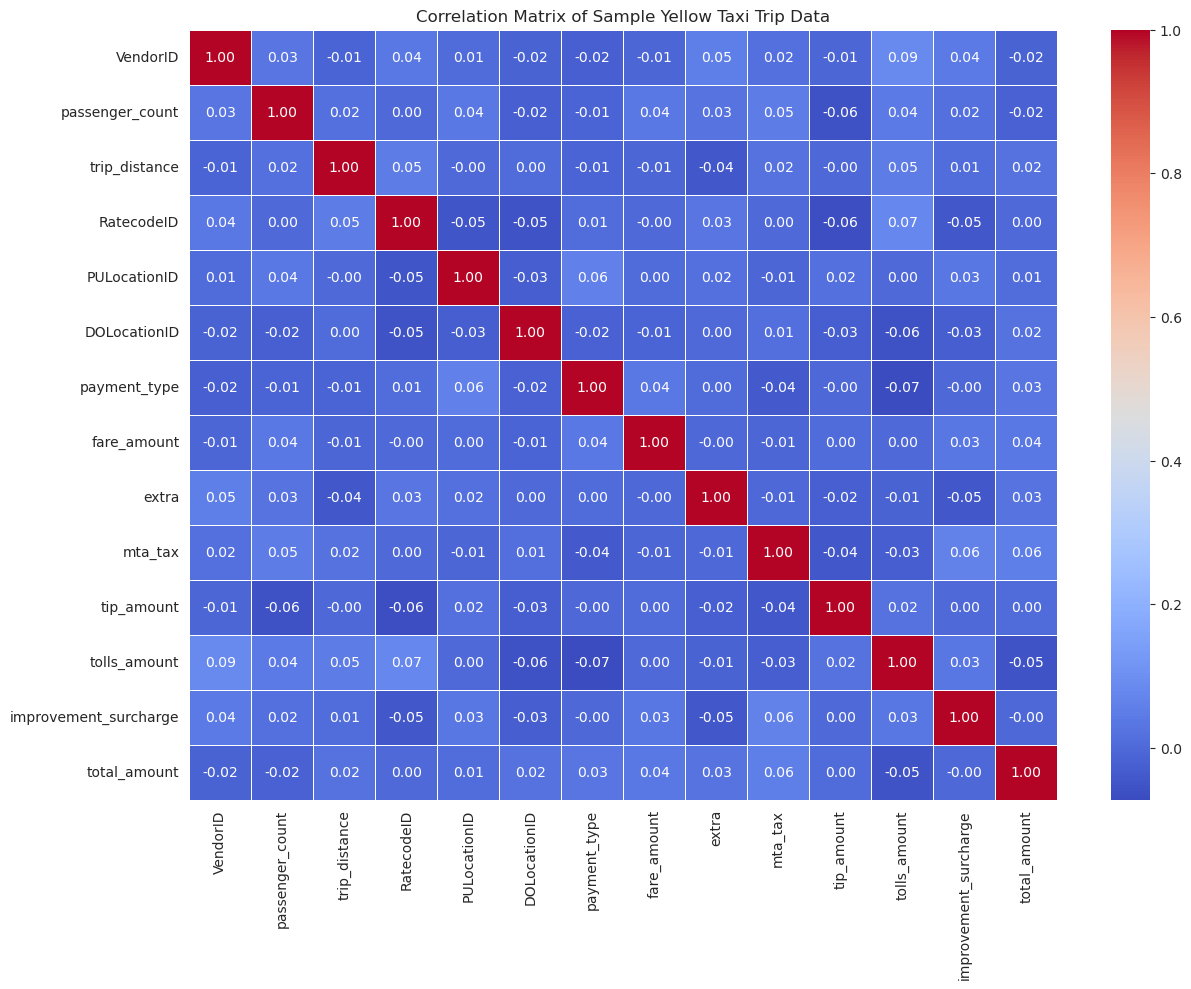

In [49]:

import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame with a similar structure to the yellow taxi data
sample_data = {
    'VendorID': np.random.randint(1, 3, size=1000),
    'passenger_count': np.random.randint(1, 6, size=1000),
    'trip_distance': np.random.uniform(0.5, 10, size=1000),
    'RatecodeID': np.random.randint(1, 6, size=1000),
    'PULocationID': np.random.randint(1, 266, size=1000),
    'DOLocationID': np.random.randint(1, 266, size=1000),
    'payment_type': np.random.randint(1, 5, size=1000),
    'fare_amount': np.random.uniform(2.5, 100, size=1000),
    'extra': np.random.uniform(0, 5, size=1000),
    'mta_tax': np.random.uniform(0, 1, size=1000),
    'tip_amount': np.random.uniform(0, 20, size=1000),
    'tolls_amount': np.random.uniform(0, 10, size=1000),
    'improvement_surcharge': np.random.uniform(0, 1, size=1000),
    'total_amount': np.random.uniform(2.5, 150, size=1000)
}

sample_df = pd.DataFrame(sample_data)

# Compute the correlation matrix
sample_corr_matrix = sample_df.corr()

# Create a heatmap visualization of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(sample_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sample Yellow Taxi Trip Data')
plt.show()


In [52]:
# Import the storage module
from google.cloud import storage
import requests

# Create a client object that points to GCS
storage_client = storage.Client()

# Define the GCS bucket name and prefix (if any)
bucket_name = 'my-bigdata-project-md'
prefix = 'landing/'

# Get a list of the 'blobs' (objects or files) in the bucket
blobs = storage_client.list_blobs(bucket_name, prefix=prefix)

# Iterate through the list and perform EDA on each file
for blob in blobs:
    if blob.name.endswith('.parquet'):
        print(f"Processing file: {blob.name}")
        df = pd.read_parquet(f"gs://{bucket_name}/{blob.name}", engine='pyarrow')
        perform_EDA(df, blob.name)

Processing file: landing/yellow_tripdata_2015-01.parquet
Performing EDA on landing/yellow_tripdata_2015-01.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2015-01-01 00:11:33   2015-01-01 00:16:48                1           1.00           1                  N            41           166             1         5.70   0.50     0.50        1.40          0.00                   0.00          8.40                 None        None
1         1  2015-01-01 00:18:24   2015-01-01 00:24:20                1           0.90           1                  N           166           238             3         6.00   0.50     0.50        0.00          0.00                   0.00          7.30                 None        None
2         1  2015-01-01 00:26:

Performing EDA on landing/yellow_tripdata_2015-06.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2015-06-01 00:04:04   2015-06-01 00:13:02                1           1.10           1                  N            79           148             3         7.50   0.50     0.50        0.00          0.00                   0.30          8.80                 None        None
1         1  2015-06-01 00:42:13   2015-06-01 00:52:37                1           3.40           1                  N            87            68             1        12.00   0.50     0.50        1.50          0.00                   0.30         14.80                 None        None
2         1  2015-06-01 00:24:29   2015-06-01 00:50:18                4           5.40 

Performing EDA on landing/yellow_tripdata_2015-11.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2015-11-01 00:10:52   2015-11-01 00:16:39                2           1.00           1                  N           261            87             2         5.50   0.50     0.50        0.00          0.00                   0.30          6.80                 None        None
1         1  2015-11-01 00:18:14   2015-11-01 00:33:34                2           1.80           1                  N            87           144             2        10.50   0.50     0.50        0.00          0.00                   0.30         11.80                 None        None
2         1  2015-11-01 00:35:36   2015-11-01 01:19:23                2           3.50 

Performing EDA on landing/yellow_tripdata_2016-04.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2016-04-01 00:09:17   2016-04-01 00:17:18                1           2.00           1                  N           152           238             2         8.50   0.50     0.50        0.00          0.00                   0.30          9.80                 None        None
1         1  2016-04-01 00:41:18   2016-04-01 00:45:40                1           1.00           1                  N           238           166             1         6.00   0.50     0.50        2.00          0.00                   0.30          9.30                 None        None
2         1  2016-04-01 00:24:47   2016-04-01 00:43:59                1           4.80 

Performing EDA on landing/yellow_tripdata_2016-09.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2016-09-01 00:05:53   2016-09-01 00:13:33                1           1.90           1                  N           261           158             2         8.50   0.50     0.50        0.00          0.00                   0.30          9.80                 None        None
1         1  2016-09-01 00:18:25   2016-09-01 00:29:54                1           2.20           1                  N           246            79             1        10.50   0.50     0.50        2.35          0.00                   0.30         14.15                 None        None
2         1  2016-09-01 00:15:45   2016-09-01 00:32:59                1           4.30 

Performing EDA on landing/yellow_tripdata_2017-02.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2017-02-01 00:19:20   2017-02-01 00:25:56                1           2.90           1                  N            75           162             2         9.50   0.50     0.50        0.00          0.00                   0.30         10.80                 None        None
1         1  2017-02-01 00:19:55   2017-02-01 00:33:06                1           4.90           1                  N           246           166             1        15.00   0.50     0.50        3.25          0.00                   0.30         19.55                 None        None
2         1  2017-02-01 00:01:15   2017-02-01 00:09:03                2           1.50 

Performing EDA on landing/yellow_tripdata_2017-07.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2017-07-01 00:06:25   2017-07-01 00:10:50                1           1.20           1                  N           249            90             1         5.50   0.50     0.50        1.35          0.00                   0.30          8.15                 None        None
1         1  2017-07-01 00:20:04   2017-07-01 00:21:38                2           0.20           1                  N           249           158             2         3.00   0.50     0.50        0.00          0.00                   0.30          4.30                 None        None
2         1  2017-07-01 00:44:10   2017-07-01 00:59:29                1           4.30 

Performing EDA on landing/yellow_tripdata_2017-12.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2017-12-01 00:12:00   2017-12-01 00:12:51                1           0.00           1                  N           226           226             3         2.50   0.50     0.50        0.00          0.00                   0.30          3.80                 None        None
1         1  2017-12-01 00:13:37   2017-12-01 00:13:47                1           0.00           1                  N           226           226             3         2.50   0.50     0.50        0.00          0.00                   0.30          3.80                 None        None
2         1  2017-12-01 00:14:15   2017-12-01 00:15:05                1           0.00 

Performing EDA on landing/yellow_tripdata_2018-05.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2018-05-01 00:13:56   2018-05-01 00:22:46                1           1.60           1                  N           230            50             1         8.00   0.50     0.50        1.85          0.00                   0.30         11.15                 None        None
1         1  2018-05-01 00:23:26   2018-05-01 00:29:56                1           1.70           1                  N           263           239             1         7.50   0.50     0.50        2.00          0.00                   0.30         10.80                 None        None
2         1  2018-05-01 00:36:23   2018-05-01 00:48:26                2           2.60 

Performing EDA on landing/yellow_tripdata_2018-10.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount congestion_surcharge airport_fee
0         1  2018-10-01 00:23:34   2018-10-01 00:44:50             1.00           6.20        1.00                  N            68             7             2        20.50   0.50     0.50        0.00          0.00                   0.30         21.80                 None        None
1         1  2018-10-01 00:40:05   2018-10-01 01:01:56             1.00          12.60        1.00                  N           132             9             2        35.00   0.50     0.50        0.00          0.00                   0.30         36.30                 None        None
2         1  2018-10-01 00:05:35   2018-10-01 00:19:38             1.00           6.10 

Performing EDA on landing/yellow_tripdata_2019-03.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge airport_fee
0         1  2019-03-01 00:24:41   2019-03-01 00:25:31             1.00           0.00        1.00                  N           145           145             2         2.50   0.50     0.50        0.00          0.00                   0.30          3.80                  0.00        None
1         1  2019-03-01 00:25:27   2019-03-01 00:36:37             2.00           3.70        1.00                  N            95           130             1        13.00   0.50     0.50        0.70          0.00                   0.30         15.00                  0.00        None
2         1  2019-03-01 00:05:21   2019-03-01 00:38:23             1.00          14.

Performing EDA on landing/yellow_tripdata_2019-08.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge airport_fee
0         1  2019-08-01 00:09:46   2019-08-01 00:10:36             1.00           0.00        1.00                  N           145           145             2         2.50   0.50     0.50        0.00          0.00                   0.30          3.80                  0.00        None
1         1  2019-08-01 00:30:47   2019-08-01 00:31:39             1.00           0.00        1.00                  N           145           145             2         2.50   0.50     0.50        0.00          0.00                   0.30          3.80                  0.00        None
2         1  2019-08-01 00:44:50   2019-08-01 00:46:32             1.00           7.

Performing EDA on landing/yellow_tripdata_2020-01.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge airport_fee
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03             1.00           1.20        1.00                  N           238           239             1         6.00   3.00     0.50        1.47          0.00                   0.30         11.27                  2.50        None
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04             1.00           1.20        1.00                  N           239           238             1         7.00   3.00     0.50        1.50          0.00                   0.30         12.30                  2.50        None
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52             1.00           0.

Performing EDA on landing/yellow_tripdata_2020-06.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge airport_fee
0         1  2020-06-01 00:31:23   2020-06-01 00:49:58             1.00           3.60        1.00                  N           140            68             1        15.50   3.00     0.50        4.00          0.00                   0.30         23.30                  2.50        None
1         1  2020-06-01 00:42:50   2020-06-01 01:04:33             1.00           5.60        1.00                  N            79           226             1        19.50   3.00     0.50        2.00          0.00                   0.30         25.30                  2.50        None
2         1  2020-06-01 00:39:51   2020-06-01 00:49:09             1.00           2.

Performing EDA on landing/yellow_tripdata_2020-11.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee
0         1  2020-11-01 00:37:37   2020-11-01 00:51:45             1.00           1.80        1.00                  N           246           137             1        10.00   3.00     0.50        4.10          0.00                   0.30         17.90                  2.50          NaN
1         1  2020-11-01 00:17:41   2020-11-01 00:32:22             2.00           2.80        1.00                  Y           229             4             2        11.50   3.00     0.50        0.00          0.00                   0.30         15.30                  2.50          NaN
2         1  2020-11-01 00:42:29   2020-11-01 01:09:08             2.00          

Performing EDA on landing/yellow_tripdata_2021-04.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee
0         1  2021-04-01 00:00:18   2021-04-01 00:21:54             1.00           8.40        1.00                  N            79           116             1        25.50   3.00     0.50        5.85          0.00                   0.30         35.15                  2.50         0.00
1         1  2021-04-01 00:42:37   2021-04-01 00:46:23             1.00           0.90        1.00                  N            75           236             2         5.00   3.00     0.50        0.00          0.00                   0.30          8.80                  2.50         0.00
2         1  2021-04-01 00:57:56   2021-04-01 01:08:22             1.00          

Performing EDA on landing/yellow_tripdata_2021-09.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee
0         2  2021-09-01 06:04:34   2021-09-01 06:15:28             2.00           4.90        1.00                  N            87           229             1        16.00   0.50     0.50        2.00          0.00                   0.30         21.80                  2.50         0.00
1         2  2021-09-01 06:26:31   2021-09-01 06:32:39             1.00           1.13        1.00                  N           162           229             1         6.00   0.50     0.50        1.96          0.00                   0.30         11.76                  2.50         0.00
2         2  2021-09-01 06:36:15   2021-09-01 06:40:30             2.00          

Performing EDA on landing/yellow_tripdata_2022-02.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee
0         1  2022-02-01 00:06:58   2022-02-01 00:19:24             1.00           5.40        1.00                  N           138           252             1        17.00   1.75     0.50        3.90          0.00                   0.30         23.45                  0.00         1.25
1         1  2022-02-01 00:38:22   2022-02-01 00:55:55             1.00           6.40        1.00                  N           138            41             2        21.00   1.75     0.50        0.00          6.55                   0.30         30.10                  0.00         1.25
2         1  2022-02-01 00:03:20   2022-02-01 00:26:59             1.00          

Performing EDA on landing/yellow_tripdata_2022-07.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee
0         1  2022-07-01 00:20:06   2022-07-01 00:39:13             1.00          10.10        1.00                  N            70            33             1        28.50   0.50     0.50        8.90          0.00                   0.30         38.70                  0.00         0.00
1         2  2022-07-01 00:29:11   2022-07-01 00:38:00             1.00           1.67        1.00                  N           162            48             1         8.00   0.50     0.50        1.00          0.00                   0.30         12.80                  2.50         0.00
2         1  2022-07-01 00:03:56   2022-07-01 00:11:49             1.00          

Performing EDA on landing/yellow_tripdata_2022-12.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee
0         1  2022-12-01 00:37:35   2022-12-01 00:47:35             1.00           2.00        1.00                  N           170           237             1         8.50   3.00     0.50        3.10          0.00                   0.30         15.40                  2.50         0.00
1         1  2022-12-01 00:34:35   2022-12-01 00:55:21             0.00           8.40        1.00                  N           138           141             2        26.00   4.25     0.50        0.00          0.00                   0.30         31.05                  2.50         1.25
2         1  2022-12-01 00:33:26   2022-12-01 00:37:34             1.00          

Performing EDA on landing/yellow_tripdata_2023-05.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_fee
0         1  2023-05-01 00:33:13   2023-05-01 00:53:01             0.00           7.80        1.00                  N           138            43             1        33.80   7.75     0.50        8.60          0.00                   1.00         51.65                  0.00         1.75
1         1  2023-05-01 00:42:49   2023-05-01 01:11:18             2.00           8.10        1.00                  N           138           262             1        35.90  10.25     0.50        9.50          0.00                   1.00         57.15                  2.50         1.75
2         1  2023-05-01 00:56:34   2023-05-01 01:13:39             2.00          

Performing EDA on landing/yellow_tripdata_2023-10.parquet
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  Airport_fee
0         1  2023-10-01 00:16:44   2023-10-01 00:16:49             1.00           0.00        1.00                  N           168           168             2         3.00   1.00     0.50        0.00          0.00                   1.00          5.50                  0.00         0.00
1         1  2023-10-01 00:23:24   2023-10-01 00:23:47             1.00           0.00        1.00                  N           168           168             2         3.00   1.00     0.50        0.00          0.00                   1.00          5.50                  0.00         0.00
2         1  2023-10-01 00:21:18   2023-10-01 00:27:31             1.00          

In [ ]:
df.describe()